# Heart Failure Prediction Dataset : VERSION_2

**Objectif** : Identifier une possible défaillance cardiaque chez l'individu 

### Packages necessaires & dataset 

In [1]:
import sys 
#sys.path.insert(0, "C://Users/asnga/KatalyseGits/mypackage")
sys.path.append("../")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline
from mypackage.functions import *
from mypackage.classifcationmodels import *
from mypackage.encoding_functions import *

# from sklearn.impute import SimpleImputer
# from sklearn.datasets import make_classification, load_iris
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,RobustScaler
# from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

In [2]:
#Data retrieving  
HeartD_df = pd.read_csv("heart.csv")

In [3]:
#df : deep copy of initial dataset
df = HeartD_df.copy()

### Analyse de forme:

In [4]:
# # # to show all the rows of the dataset
# pd.set_option('display.max_row',df.shape[0])

# # # to show all the columns of the dataset
# pd.set_option('display.max_columns',df.shape[1])

In [5]:
# #First row of the dataset 
# df.head(5)

- **Analyse Target :**
 
 variable target : **HeartDisease**

- **Rows & columns :** 

In [6]:
# dshape(df)

- **Vairables types :** 

In [7]:
# data_types(df)

- **Some statistics on numerics variables :** 

In [8]:
#stats(df)


In [9]:
#df.describe(include="all").T

- **Analyse of missing values :**

In [10]:
#map_nan(df)

In [11]:
#percentage_mv(df)


### Analyse de fond (Préparation des données) 




- **Visualisation de la target :**



In [12]:
#info_target(df,"HeartDisease")

- **Analyse des Variables Continues :**

In [13]:
#plot_num(df)

- **Analyse des Variables Discrètes :**

In [14]:
#plot_cat(df)

In [15]:
#ditrib_df(df)

- **Signification des variables :**



- **Relation Variables / Target :**
    - Création de sous-ensembles: heartdisease(1) & notheartdisease(1) 
   
   

In [16]:
# target_yes = df[df["HeartDisease"] == 1]  
# target_no = df[df["HeartDisease"] == 0]

In [17]:
#df['Cholesterol_measure'] =  df.apply(lambda x: np.where(x["Cholesterol"] > 0, 1, 0) , axis=1)

   - Analyse Target / concat ( cat+num)
    - Analyse Target / Variables categorielles 
    - Analyse Target / Variables numeriques  
    

### Conclusions de base:
       Ce jeu de données ne possedent pas de valeurs manquantes, avec une majorité de valeurs hommes que femmes. 
    

### **Preprocessing**

**Preparing dataset into train & test samples**

In [18]:
#extraction de la cible(y) et des variables explicatives(X)
y=df["HeartDisease"]
X=df.drop(["HeartDisease"],axis=1)

In [19]:
#séparation des données : données d'entrainement & données de test 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### _Première itération_ : Encodages de features 

**Encodage _1**
        . Traitement des variables catégorielles : OneHotEncoder()
        . Traitement des variables numériques : RobustSclaer()

In [20]:
# Encoding training Dataset  
X1_train = pd.concat([nums_values(X_train,X_train, RobustScaler()),
                      encode_cat_values(X_train, X_train, OneHotEncoder())],axis=1)

In [21]:
# Encoding test Dataset 
X1_test = pd.concat([nums_values(X_train,X_test, RobustScaler()),
                      encode_cat_values(X_train, X_test, OneHotEncoder())],axis=1)

**Modelisation_1** 

In [22]:
clas_ml(X1_train, y_train, X1_test, y_test)

C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted t

'OK'

In [23]:
report(y_test)

,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
Nearest Neighbors,0.876812,0.916667,0.871951,0.883929,0.893750
Linear SVM,0.862319,0.898734,0.865854,0.857143,0.881988
RBF SVM,0.753623,0.712389,0.981707,0.419643,0.825641
Gaussian Process,0.894928,0.919255,0.902439,0.883929,0.910769
Decision Tree,0.786232,0.834395,0.798780,0.767857,0.816199
Random Forest,0.855072,0.882716,0.871951,0.830357,0.877301
AdaBoost,0.865942,0.926174,0.841463,0.901786,0.881789
Naive Bayes,0.884058,0.928571,0.871951,0.901786,0.899371


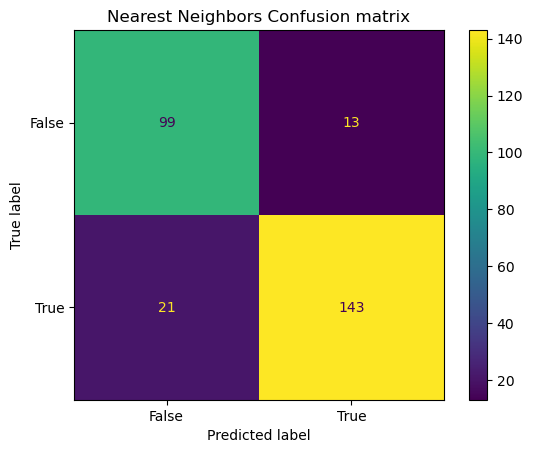

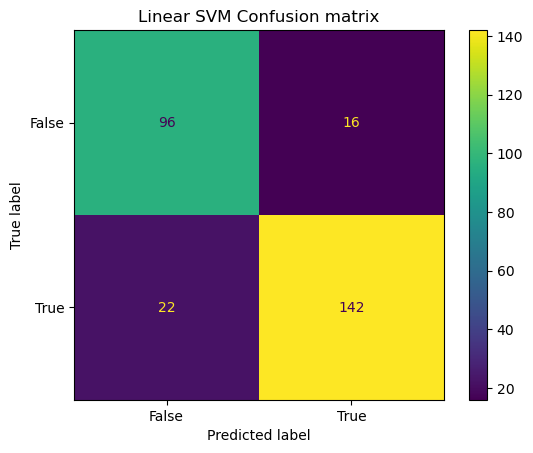

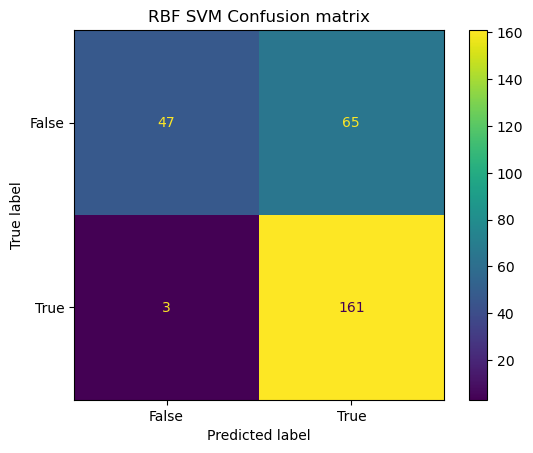

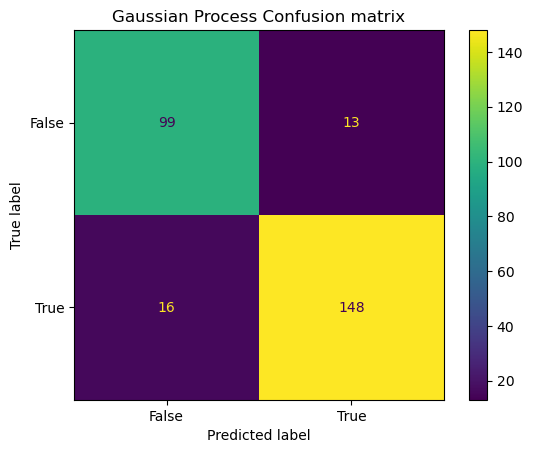

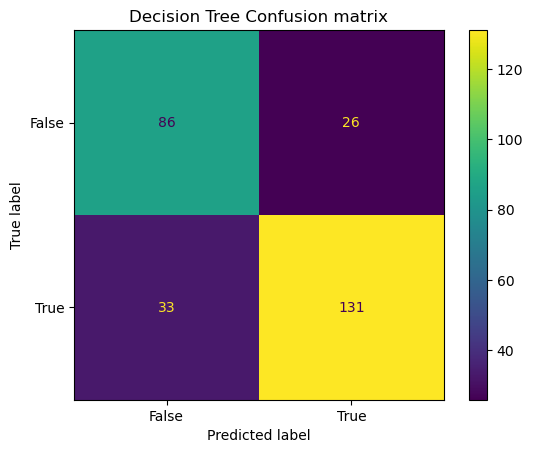

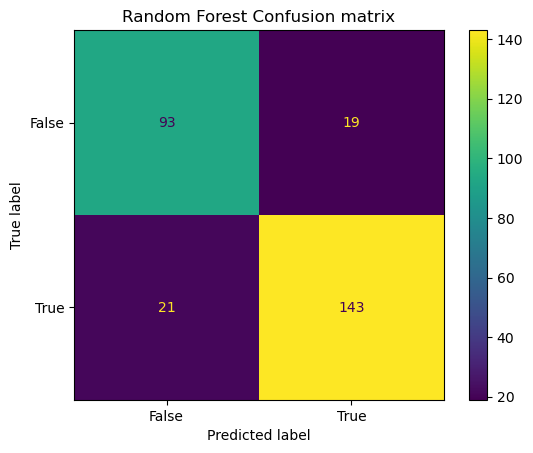

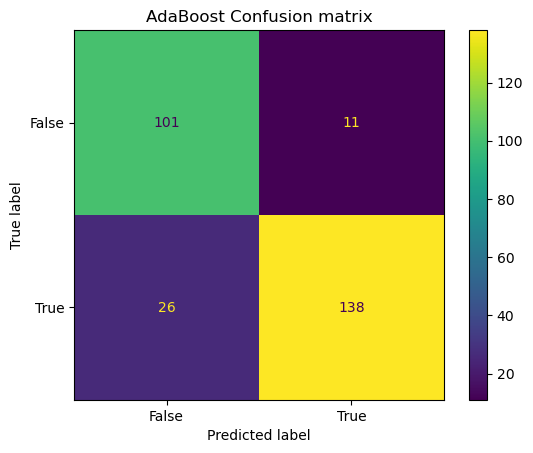

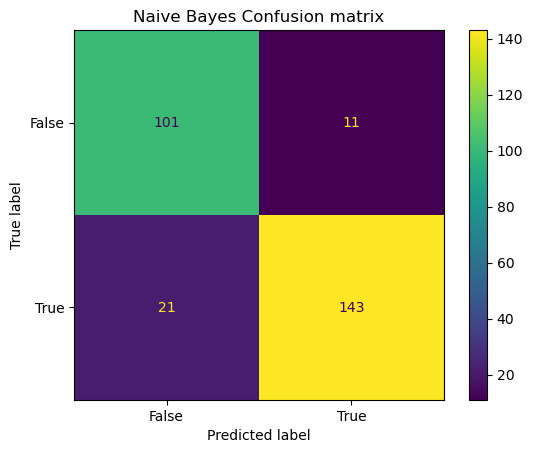

In [24]:
conf_matrix(y_test)

**Encodage _2**
        . Traitement des variables catégorielles : OneHotEncoder()
        . Traitement des variables numériques : StandardSclaer()

In [25]:
# Encoding training Dataset  
X2_train = pd.concat([nums_values(X_train,X_train, StandardScaler()),
                      encode_cat_values(X_train, X_train, OneHotEncoder())],axis=1)

In [26]:
# Encoding test Dataset 
X2_test = pd.concat([nums_values(X_train,X_test, StandardScaler()),
                      encode_cat_values(X_train, X_test, OneHotEncoder())],axis=1)

**Modelisation_2** 

In [27]:
clas_ml(X2_train, y_train, X2_test, y_test)

C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted t

'OK'

In [28]:
report(y_test)

,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
Nearest Neighbors,0.873188,0.921569,0.859756,0.892857,0.889590
Linear SVM,0.880435,0.922581,0.871951,0.892857,0.896552
RBF SVM,0.706522,0.675105,0.975610,0.312500,0.798005
Gaussian Process,0.894928,0.914110,0.908537,0.875000,0.911315
Decision Tree,0.807971,0.867550,0.798780,0.821429,0.831746
Random Forest,0.840580,0.889610,0.835366,0.848214,0.861635
AdaBoost,0.865942,0.926174,0.841463,0.901786,0.881789
Naive Bayes,0.884058,0.928571,0.871951,0.901786,0.899371


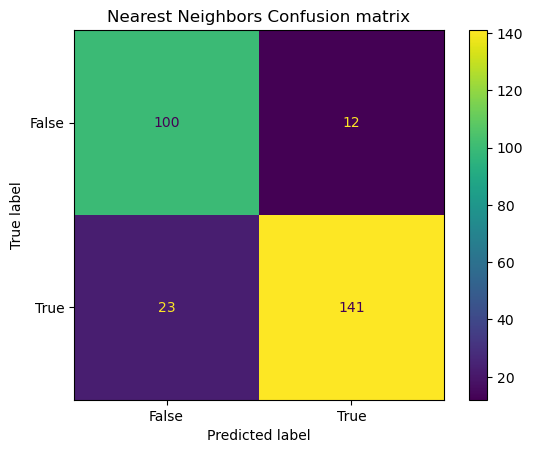

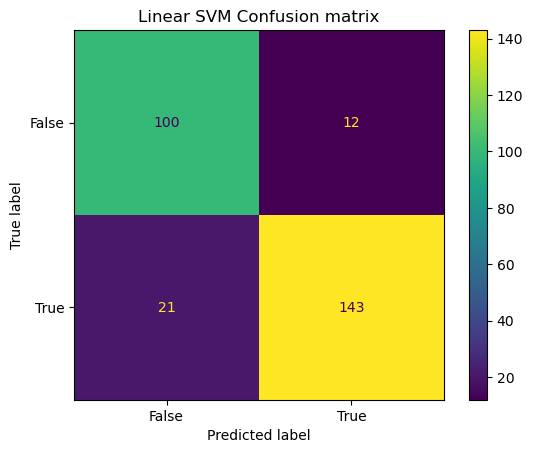

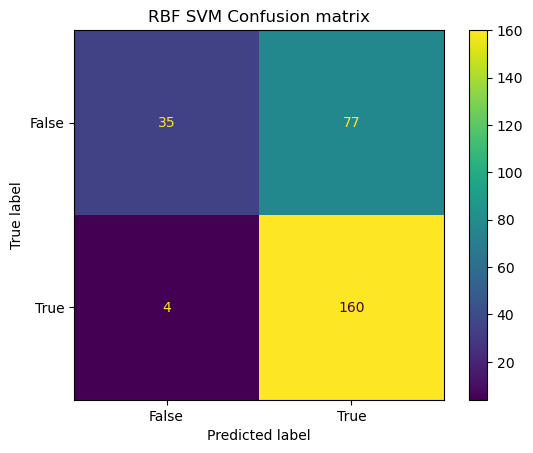

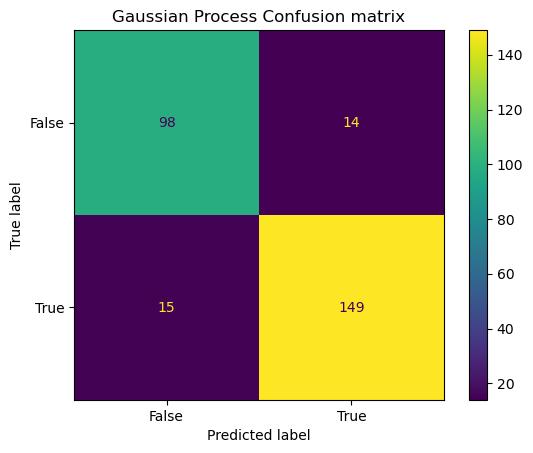

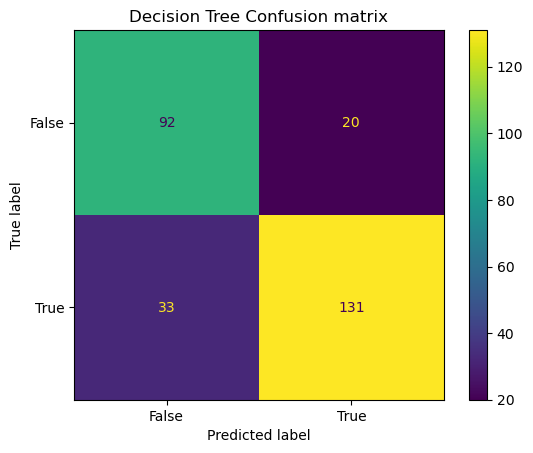

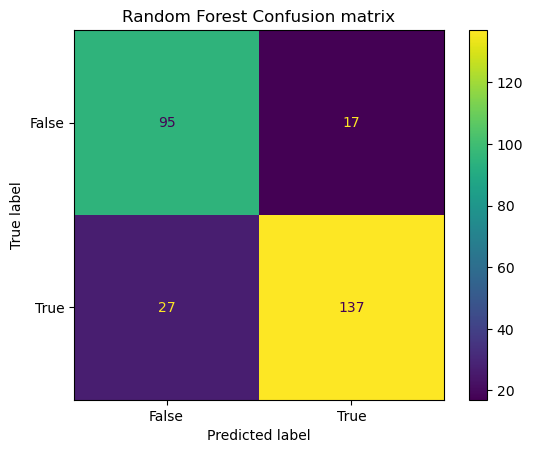

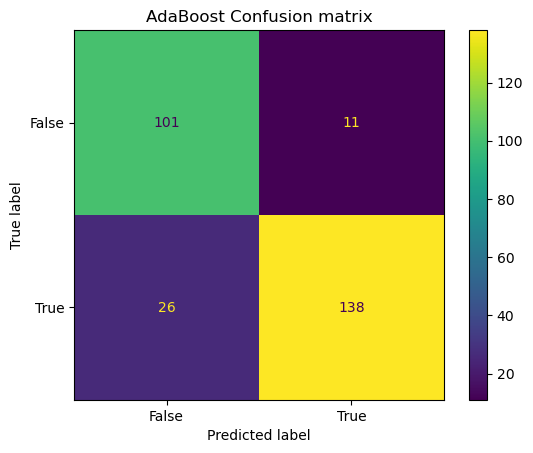

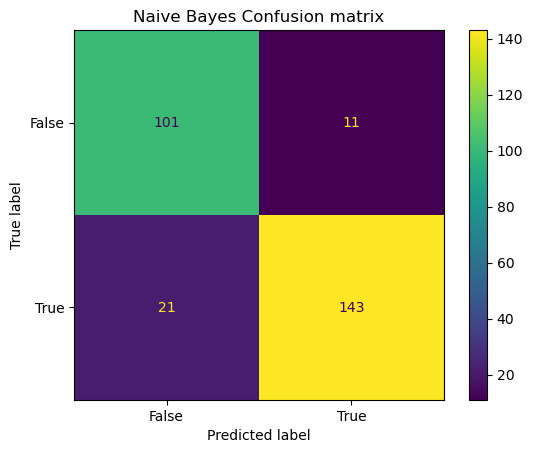

In [29]:
conf_matrix(y_test)

### _Deuxième itération_ : Selection  de features

   **Methode 1 :**
   - Création de sous-ensembles: nouvelle colone pour taux_cholesterol infé à 0 <==>
     cholesterol_rate = 0 :: non measure , new_col <=> choles_rate measure = O for no & 1 for yes , 
        function apply to use 

In [30]:
df_new = df.copy()

In [31]:
df_new['Cholesterol_measure'] =  (df_new[["Cholesterol"]].sum(axis=1) > 0).astype(int)

In [32]:
df_new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_measure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [33]:
y_op = df_new["HeartDisease"]
X_op = df_new.drop(["HeartDisease"],axis=1)

In [34]:
#séparation des données : données d'entrainement & données de test 
X_op_train,X_op_test,y_op_train,y_op_test = train_test_split(X_op, y_op, test_size=0.30, random_state=42)

In [35]:
X1_op_train = pd.concat([nums_values(X_op_train,X_op_train, StandardScaler()),
                      encode_cat_values(X_op_train, X_op_train, OneHotEncoder())],axis=1)

In [36]:
X1_op_test = pd.concat([nums_values(X_op_train,X_op_test, StandardScaler()),
                        encode_cat_values(X_op_train, X_op_test, OneHotEncoder())],axis=1)

In [37]:
clas_ml(X1_op_train, y_op_train, X1_op_test, y_op_test)

C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted t

'OK'

In [38]:
report(y_test)

,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
Nearest Neighbors,0.869565,0.910256,0.865854,0.875000,0.887500
Linear SVM,0.884058,0.912500,0.890244,0.875000,0.901235
RBF SVM,0.706522,0.675105,0.975610,0.312500,0.798005
Gaussian Process,0.894928,0.919255,0.902439,0.883929,0.910769
Decision Tree,0.807971,0.867550,0.798780,0.821429,0.831746
Random Forest,0.876812,0.886905,0.908537,0.830357,0.897590
AdaBoost,0.865942,0.926174,0.841463,0.901786,0.881789
Naive Bayes,0.891304,0.929487,0.884146,0.901786,0.906250


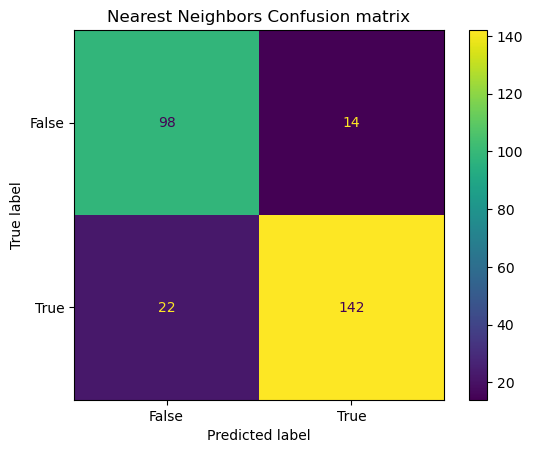

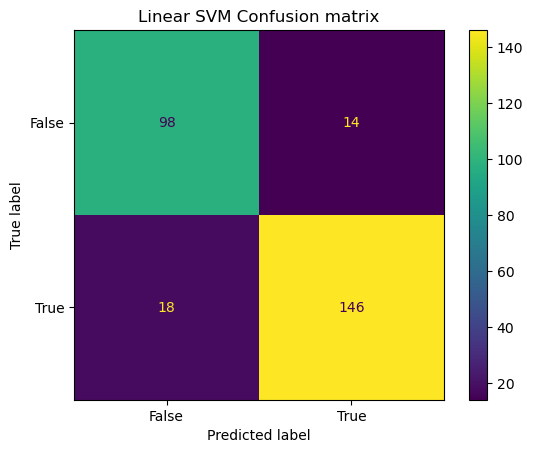

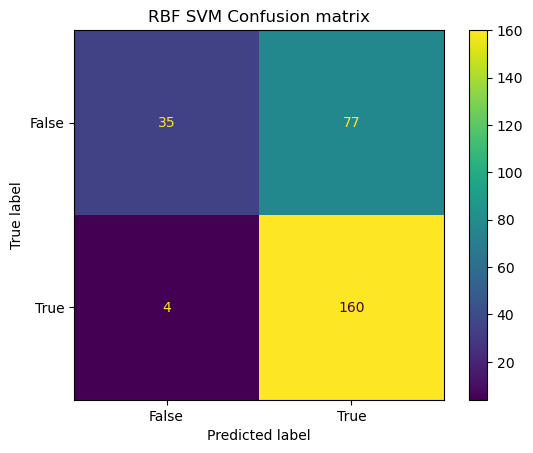

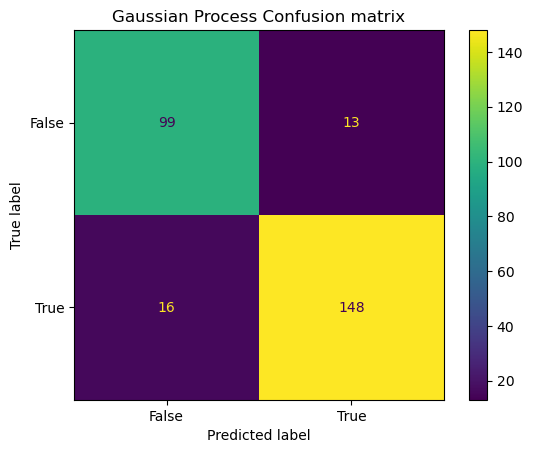

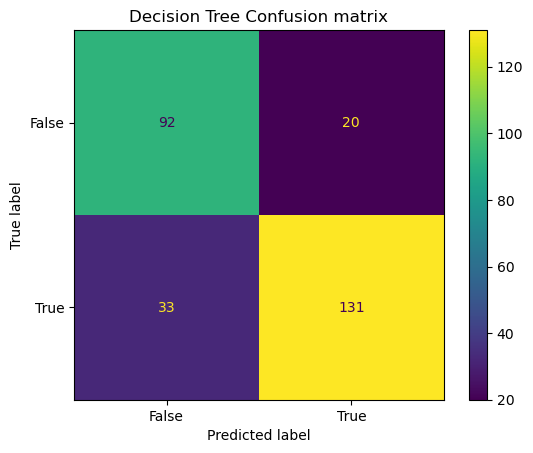

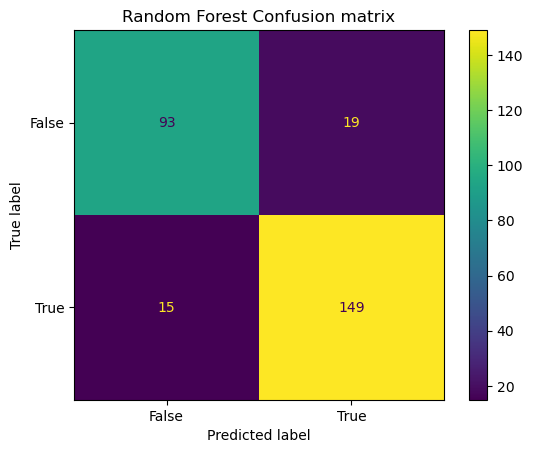

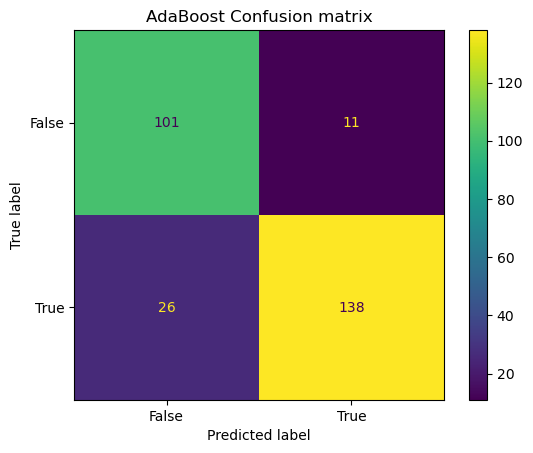

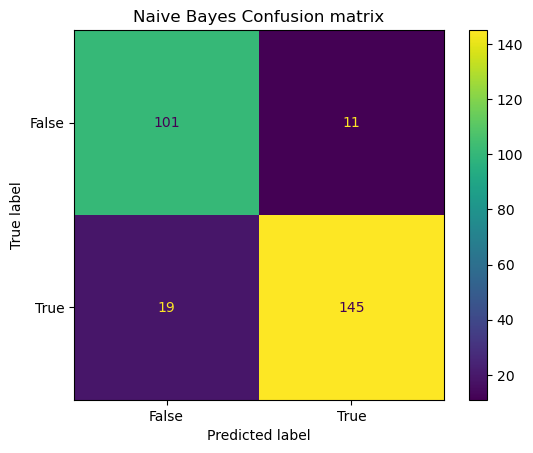

In [39]:
conf_matrix(y_test)

**Methode 2:** 
- Suppresion des colones : 
    - ExerciceAngina
    - FastingBS

In [40]:
X_op.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Cholesterol_measure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,1


In [41]:
X_op2 = X_op.drop(["ExerciseAngina", "FastingBS"],axis = 1)

In [42]:
#séparation des données : données d'entrainement & données de test 
X_op2_train,X_op2_test,y_op2_train,y_op2_test = train_test_split(X_op2, y_op, test_size=0.30, random_state=42)

In [43]:
X2_op_train = pd.concat([nums_values(X_op2_train,X_op2_train, StandardScaler()),
                      encode_cat_values(X_op_train, X_op_train, OneHotEncoder())],axis=1)
#***
X2_op_test = pd.concat([nums_values(X_op2_train,X_op2_test, StandardScaler()),
                        encode_cat_values(X_op_train, X_op_test, OneHotEncoder())],axis=1)

In [44]:
clas_ml(X2_op_train, y_op_train, X2_op_test, y_op_test)

C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\asnga\anaconda3\envs\katalyse\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted t

'OK'

In [45]:
report(y_op_test)

,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
Nearest Neighbors,0.869565,0.895062,0.884146,0.848214,0.889571
Linear SVM,0.884058,0.902439,0.902439,0.857143,0.902439
RBF SVM,0.728261,0.696035,0.963415,0.383929,0.808184
Gaussian Process,0.887681,0.918239,0.890244,0.883929,0.904025
Decision Tree,0.793478,0.874126,0.762195,0.839286,0.814332
Random Forest,0.873188,0.886228,0.902439,0.830357,0.894260
AdaBoost,0.862319,0.931507,0.829268,0.910714,0.877419
Naive Bayes,0.887681,0.923567,0.884146,0.892857,0.903427


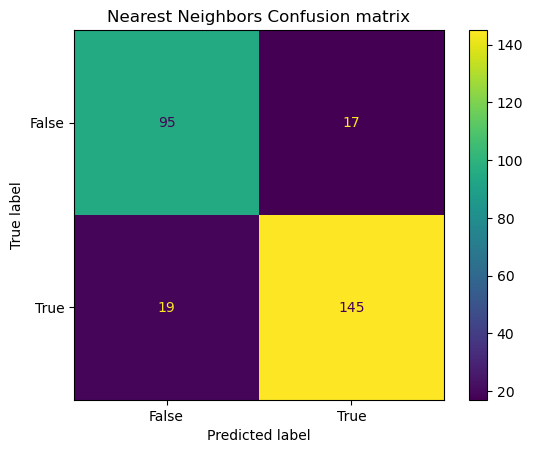

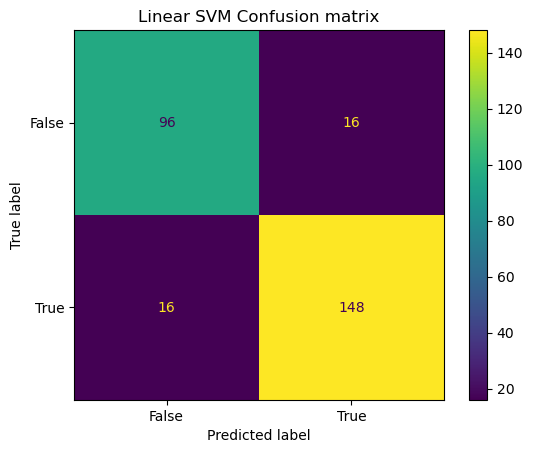

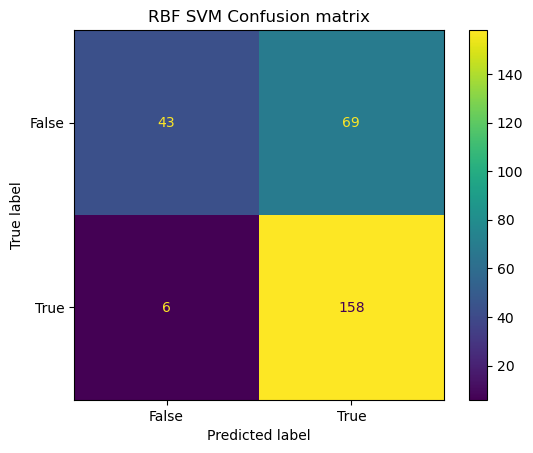

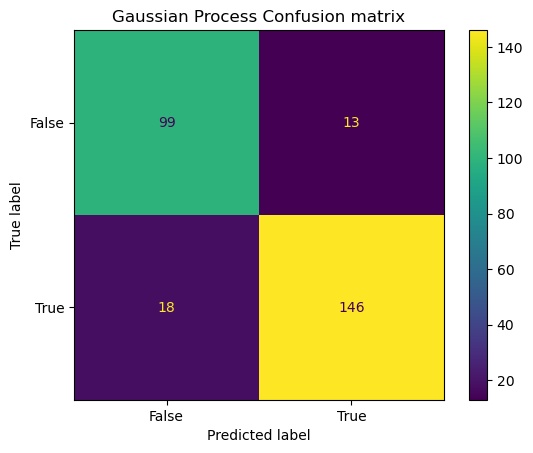

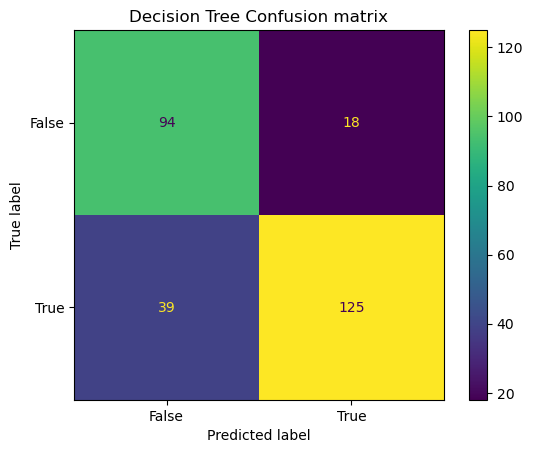

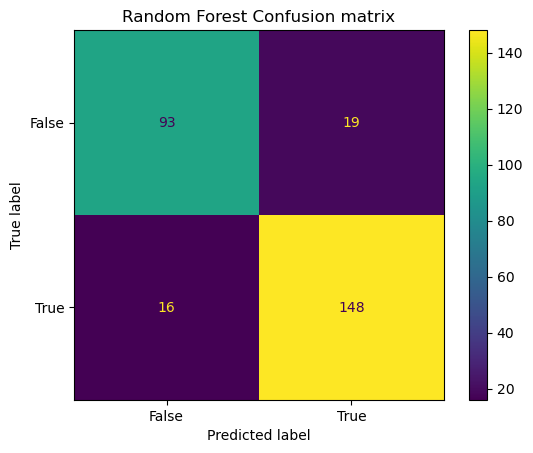

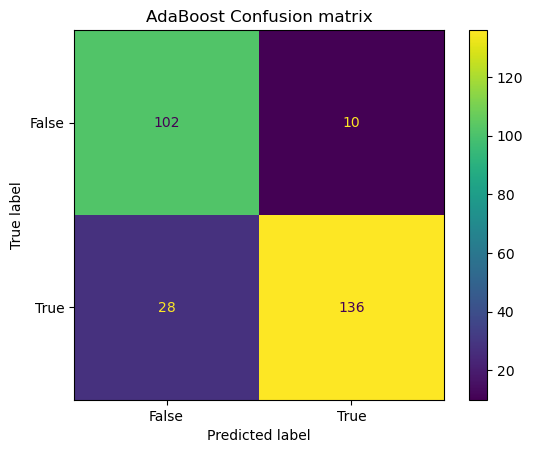

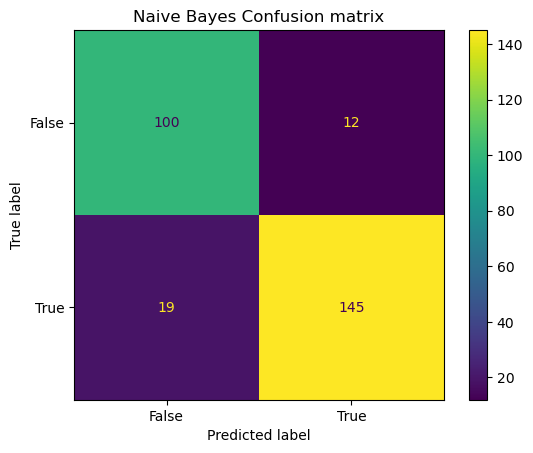

In [46]:
conf_matrix(y_op_test)